In [1]:
import sys
kaggle_path_prefix = "../input/mylibrary"
sys.path.append(kaggle_path_prefix)

In [2]:
from mylibrary.utils.misc import plot_voxel_enhance
from mylibrary import augmentation
import numpy as np
import os
import pandas as pd
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
#得到训练集
train_info=pd.read_csv("../input/train-data/train_val.csv")
train_nodule_path="../input/train-data/train_val/"
name = train_info.loc[:, 'name']
y_train=train_info.loc[:, 'label']
train_num=len(name)
x_train = np.empty((train_num,*(32,32,32), 1))
x_train_seg=np.empty((train_num,*(32,32,32), 1))

for i in range(train_num):
        with np.load(os.path.join(train_nodule_path, '%s.npz' % name[i])) as npz:
            voxel=npz['voxel'][34:66,34:66,34:66]
            seg=npz['seg'][34:66,34:66,34:66]
            voxel=np.expand_dims(voxel,axis=-1)
            seg=np.expand_dims(seg,axis=-1)
            
            x_train[i,]=voxel
            x_train_seg[i,]=seg

print(x_train.shape)
print('seg shape',x_train_seg.shape)
#np.save('x_test.npy',x_test)


y_train=to_categorical(y_train,2)
print(y_train.shape )
num=train_num-20
x_all2=x_train*x_train_seg
y_all=y_train
x_all_seg=x_train_seg
xseg_train=x_all2[0:num].copy()
yseg_train=y_train[0:num].copy()
print(yseg_train.shape)


(465, 32, 32, 32, 1)
seg shape (465, 32, 32, 32, 1)
(465, 2)
(445, 2)


In [4]:
#数据增强
all_num=465
num=all_num-20
'''
index1=np.random.randint(0,all_num-20,200)
index2=np.random.randint(0,all_num-20,200)
index3=np.random.randint(0,all_num-20,200)



x_train2=x_all2[index1].copy()
y_train2=y_all[index1].copy()
seg2=x_all_seg[index1].copy()
x_train3=x_all2[index2].copy()
y_train3=y_all[index2].copy()
seg3=x_all_seg[index2].copy()
x_train4=x_all2[index3].copy()
y_train4=y_all[index3].copy()
seg4=x_all_seg[index3].copy()


'''

x_train2=x_all2[0:num].copy()
y_train2=y_all[0:num].copy()
seg2=x_all_seg[0:num].copy()
x_train3=x_all2[0:num].copy()
y_train3=y_all[0:num].copy()
seg3=x_all_seg[0:num].copy()
x_train4=x_all2[0:num].copy()
y_train4=y_all[0:num].copy()
seg4=x_all_seg[0:num].copy()

x_train2,y_train2,seg2=argumentation.flip_dim1(x_train2,y_train2,seg2)
x_train3,y_train3,seg3=argumentation.flip_dim2(x_train3,y_train3,seg3)
x_train4,y_train4,seg4=argumentation.flip_dim3(x_train4,y_train4,seg4)



x_train_mix,y_train_mix,seg_mix=argumentation.mix_up(x_all2[0:num],y_all[0:num],x_all_seg[0:num],0.7,200)

print(y_all.shape)
#x_train=x_train*seg_train
arg_x1=np.concatenate((x_train2,x_train3,x_train4,x_train_mix))
arg_y1=np.concatenate((y_train2,y_train3,y_train4,y_train_mix))
arg_seg=np.concatenate((seg2,seg3,seg4,seg_mix))

x_train_mix2,y_train_mix2,seg_mix2=argumentation.mix_up(arg_x1,arg_y1,arg_seg,0.7,800)

arg_x1=np.concatenate((x_train2,x_train3,x_train4,x_all2))
arg_y1=np.concatenate((y_train2,y_train3,y_train4,y_all))

print(arg_x1.shape)
print(arg_y1.shape)
#print(arg_y2[60])
#print(arg_x2[60][15][:][15][0])

"""
x_train2,y_train2=argumentation.flip_dim1(x_all,y_all)
x_train3,y_train3=argumentation.flip_dim2(x_all,y_all)
x_train4,y_train4=argumentation.flip_dim3(x_all,y_all)

x_train2,y_train2=argumentation.flip_dim2(x_train2,y_train2)
x_train3,y_train3=argumentation.flip_dim3(x_train3,y_train3)
x_train4,y_train4=argumentation.flip_dim1(x_train4,y_train4)
arg_x3=np.concatenate((x_train2,x_train3,x_train4))
arg_y3=np.concatenate((y_train2,y_train3,y_train4))
"""

(465, 2)
(1800, 32, 32, 32, 1)
(1800, 2)


'\nx_train2,y_train2=argumentation.flip_dim1(x_all,y_all)\nx_train3,y_train3=argumentation.flip_dim2(x_all,y_all)\nx_train4,y_train4=argumentation.flip_dim3(x_all,y_all)\n\nx_train2,y_train2=argumentation.flip_dim2(x_train2,y_train2)\nx_train3,y_train3=argumentation.flip_dim3(x_train3,y_train3)\nx_train4,y_train4=argumentation.flip_dim1(x_train4,y_train4)\narg_x3=np.concatenate((x_train2,x_train3,x_train4))\narg_y3=np.concatenate((y_train2,y_train3,y_train4))\n'

In [ ]:
plot_voxel_enhance(arg_x1[1305].squeeze(),alpha=0.2)

# Create Sequential Model

In [5]:
import tensorflow as tf
import tensorflow.keras
#from keras.utils import to_categorical
print("TensorFlow version",tf.__version__)
#print("Keras version",keras.__version__)


TensorFlow version 2.1.0


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization,MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as pl
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
from keras.utils import to_categorical
from mylibrary.models.misc import set_gpu_usage


In [ ]:
set_gpu_usage()

In [33]:
# fix random seed for reproducibility


seed = 7
sample_shape=(32,32,32,1)
np.random.seed(seed)
# load pima indians dataset

file_path='Kfoldmixseg-epo-{epoch:02d}-acc-{accuracy:.2f}-val-{val_accuracy:.2f}.hdf5'

checkpoint = ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_best_only=True,mode='auto')
tensorboard =TensorBoard(log_dir="seq/log")

callback_lists=[tensorboard,checkpoint]
y_all_orig=y_all[:,[0]]
#K折交叉验证
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(x_all2, y_all_orig):
  # create model
    
    model=Sequential()

#x_train=np.zeros(297,32,32,32,1)
#y_train=np.zeros(297,2)
#seg_train=np.zeros(297,32,32,32,1)
    model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization(center=True, scale=True))
    model.add(Dropout(0.5))
    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization(center=True, scale=True))
    model.add(Dropout(0.4))


    model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization(center=True, scale=True))
    model.add(Dropout(0.6))

    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(2, activation='softmax'))

   
    # Compile model
    model.compile(loss='categorical_crossentropy',
              #loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
     
    # Fit the model
   # y_train=to_categorical(y_train,2)
    history = model.fit(x_all2[train], y_all[train],
            batch_size=64,
            epochs=50,
            verbose=1,
            shuffle=True,
            validation_split=0.3,
            callbacks=callback_lists)
    # evaluate the model
    scores = model.evaluate(x_all2[test], y_all[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Train on 260 samples, validate on 112 samples
Epoch 1/50
256/260 [============================>.] - ETA: 0s - loss: 1.3272 - accuracy: 0.5078
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Kfoldmixseg-epo-01-acc-0.50-val-0.50.hdf5
260/260 [==============================] - 1s 6ms/sample - loss: 1.3214 - accuracy: 0.5038 - val_loss: 8.7262 - val_accuracy: 0.5000
Epoch 2/50
192/260 [=====================>........] - ETA: 0s - loss: 0.9069 - accuracy: 0.6198
Epoch 00002: val_accuracy did not improve from 0.50000
260/260 [==============================] - 0s 898us/sample - loss: 0.9227 - accuracy: 0.6000 - val_loss: 7.8052 - val_accuracy: 0.5000
Epoch 3/50
192/260 [=====================>........] - ETA: 0s - loss: 1.0384 - accuracy: 0.5312
Epoch 00003: val_accuracy did not improve from 0.50000
260/260 [==============================] - 0s 889us/sample - loss: 1.0292 - accuracy: 0.5500 - val_loss: 6.6852 - val_accuracy: 0.5000
Epoch 4/50
192/260 [==================

In [ ]:
#留一法，太慢,3层卷积，2个dense,后softmax
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

seed = 7
sample_shape=(32,32,32,1)
np.random.seed(seed)
# load pima indians dataset

file_path='Kfoldmixseg-epo-{epoch:02d}-acc-{accuracy:.2f}-val-{val_accuracy:.2f}.hdf5'

checkpoint = ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_best_only=True,mode='auto')
tensorboard =TensorBoard(log_dir="seq/log")
best_keeper = ModelCheckpoint(filepath='best.h5', verbose=1, save_weights_only=False,
                                  monitor='val_clf_acc', save_best_only=True, period=1, mode='max')
csv_logger = CSVLogger('training.csv')
early_stopping = EarlyStopping(monitor='val_clf_acc', min_delta=0, mode='max',
                                   patience=30, verbose=1)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.334, patience=10,
                                   verbose=1, mode='min', epsilon=1.e-5, cooldown=2, min_lr=0)
callback_lists=[tensorboard,checkpoint,early_stopping]
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
for train, test in loo.split(x_all2, y_all[:,[1]]):
  # create model
    
    model=Sequential()

#x_train=np.zeros(297,32,32,32,1)
#y_train=np.zeros(297,2)
#seg_train=np.zeros(297,32,32,32,1)
    model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization(center=True, scale=True))
    model.add(Dropout(0.8))
    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization(center=True, scale=True))
    model.add(Dropout(0.7))


    model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization(center=True, scale=True))
    model.add(Dropout(0.6))

    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(2, activation='softmax'))

   
    # Compile model
    model.compile(loss='categorical_crossentropy',
              #loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])
     
    # Fit the model
   # y_train=to_categorical(y_train,2)
    history = model.fit(x_all2[train], y_all[train],
            batch_size=64,
            epochs=20,
            verbose=1,
            shuffle=True,
            validation_split=0.3,
            callbacks=callback_lists)
    # evaluate the model
    scores = model.evaluate(x_all2[test], y_all[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [7]:

file_path= "seq2-seg-epo-{epoch:02d}-acc-{accuracy:.2f}-val-{val_accuracy:.2f}.hdf5"

checkpoint = ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_best_only=True,mode='auto')
tensorboard =TensorBoard(log_dir="seq/log")
callback_lists=[tensorboard,checkpoint]


In [ ]:
import h5py
print("Saving model to disk \n")
mp = 'seqchaoduodai.h5'
model.save(mp)

In [24]:
sample_shape=(32,32,32,1)
model=Sequential()
#x_train=np.zeros(297,32,32,32,1)
#y_train=np.zeros(297,2)
#seg_train=np.zeros(297,32,32,32,1)
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.4))


model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              #loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])
model.summary()
# Fit data to model


    
    

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_14 (Conv3D)           (None, 30, 30, 30, 32)    896       
_________________________________________________________________
max_pooling3d_14 (MaxPooling (None, 15, 15, 15, 32)    0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 15, 15, 15, 32)    128       
_________________________________________________________________
dropout_14 (Dropout)         (None, 15, 15, 15, 32)    0         
_________________________________________________________________
conv3d_15 (Conv3D)           (None, 13, 13, 13, 64)    55360     
_________________________________________________________________
max_pooling3d_15 (MaxPooling (None, 6, 6, 6, 64)       0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 6, 6, 6, 64)      

In [ ]:
def lr_schedule(epoch):
    """Learning Rate Schedule
    Learning rate is scheduled to be reduced after 20, 30 epochs.
    Called automatically every epoch as part of callbacks during training.
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3

    if epoch >= 30:
        lr *= 1e-2
    elif epoch >= 20:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def wd_schedule(epoch):
    """Weight Decay Schedule
    Weight decay is scheduled to be reduced after 20, 30 epochs.
    Called automatically every epoch as part of callbacks during training.
    # Arguments
        epoch (int): The number of epochs
    # Returns
        wd (float32): weight decay
    """
    wd = 1e-4

    if epoch >= 30:
        wd *= 1e-2
    elif epoch >= 20:
        wd *= 1e-1
    print('Weight decay: ', wd)
    return wd

In [15]:

#加层后的seq_model
sample_shape=(32,32,32,1)
model=Sequential()

#x_train=np.zeros(297,32,32,32,1)
#y_train=np.zeros(297,2)
#seg_train=np.zeros(297,32,32,32,1)
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
model.add(MaxPooling3D(pool_size=(2, 2 ,2),padding='same'))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2 ,2),padding='same'))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.6))


model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2 ,2),padding='same'))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))

model.add(Conv3D(256, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2 ,2),padding='same'))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              #loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_4 (Conv3D)            (None, 30, 30, 30, 32)    896       
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 15, 15, 15, 32)    0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 15, 32)    128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 15, 32)    0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 13, 13, 13, 64)    55360     
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 7, 7, 7, 64)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 7, 64)      

In [ ]:
BATCH_SIZE = 64
NUM_CLASSES = 2
NUM_EPOCHS = 30
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

history = Model2.fit(x_train, y_train,
            batch_size=16,
            epochs=20,
            verbose=1,
            shuffle=True,
            validation_split=0.3)

In [ ]:
print(history.history.keys())

In [25]:
file_path= "seq-mixdrps-seg-epo-{epoch:02d}-acc-{accuracy:.2f}-val-{val_accuracy:.2f}.hdf5"

checkpoint = ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_best_only=True,mode='auto')
tensorboard =TensorBoard(log_dir="seq/log")
callback_lists=[tensorboard,checkpoint]

In [ ]:

history = model.fit(arg_x1,arg_y1,
            batch_size=64,
            epochs=100,
            verbose=1,
            shuffle=True,
            validation_data=(xseg_train, yseg_train),
            callbacks=callback_lists)

In [26]:

history = model.fit(x_all2,y_all,
            batch_size=64,
            epochs=100,
            verbose=1,
            shuffle=True,
            validation_data=(x_all2,y_all),
            callbacks=callback_lists)

Train on 465 samples, validate on 465 samples
Epoch 1/100
448/465 [===========================>..] - ETA: 0s - loss: 0.9743 - accuracy: 0.5446
Epoch 00001: val_accuracy improved from -inf to 0.53333, saving model to seq-mixdrps-seg-epo-01-acc-0.55-val-0.53.hdf5
465/465 [==============================] - 2s 3ms/sample - loss: 0.9744 - accuracy: 0.5462 - val_loss: 5.7915 - val_accuracy: 0.5333
Epoch 2/100
448/465 [===========================>..] - ETA: 0s - loss: 0.9795 - accuracy: 0.5469
Epoch 00002: val_accuracy improved from 0.53333 to 0.53763, saving model to seq-mixdrps-seg-epo-02-acc-0.54-val-0.54.hdf5
465/465 [==============================] - 1s 1ms/sample - loss: 0.9823 - accuracy: 0.5441 - val_loss: 3.1045 - val_accuracy: 0.5376
Epoch 3/100
448/465 [===========================>..] - ETA: 0s - loss: 0.9180 - accuracy: 0.5558
Epoch 00003: val_accuracy improved from 0.53763 to 0.54409, saving model to seq-mixdrps-seg-epo-03-acc-0.55-val-0.54.hdf5
465/465 [=========================

In [ ]:
print(xseg_train.shape)
x_val=x_all2[num+1:all_num-1]
y_val=y_all[num+1:all_num-1]
score_test=model.evaluate(x_val[0:17],y_val[0:17],verbose=1)
print('Testing loss: %.4f, Testing accuracy: %.2f%%' % (score_test[0],score_test[1]*100))
score_test=model.evaluate(arg_x1,arg_y1)
print('Testing loss: %.4f, Testing accuracy: %.2f%%' % (score_test[0],score_test[1]*100))

In [ ]:
print(xseg_train.shape)
print(x_val.shape)

In [ ]:
from tensorflow.keras.models import load_model

#file_path1='./seq_model/epo-06-acc-0.64-val-0.61.hdf5'
#file_path1='./TrainedModel/log/SequentialModel1_6243.h5'
file_path1='seq-arg-seg-epo-02-acc-0.59-val-0.65.hdf5'
#file_path1='../input/train-data/seq-seg-base-epo-09-acc-0.55-val-0.65.hdf5'
model= load_model(file_path1)
#val_pre = model.predict(x_val, batch_size=5, verbose=1)
#score=model.evaluate
#test_pre=model.predict(x_test,batch_size=3,verbose=1)
score_test=model.evaluate(x_all2,y_all,verbose=1)
print('Testing loss: %.4f, Testing accuracy: %.2f%%' % (score_test[0],score_test[1]*100))

In [35]:
#参考https://blog.csdn.net/acbattle/article/details/97824441
from tensorflow.keras import backend as K
from sklearn.metrics import roc_auc_score
import tensorflow as tf
# AUC for a binary classifier
def auc(y_true, y_pred):
    ptas = tf.stack([binary_PTA(y_true,y_pred,k) for k in np.linspace(0, 1, 1000)],axis=0)
    pfas = tf.stack([binary_PFA(y_true,y_pred,k) for k in np.linspace(0, 1, 1000)],axis=0)
    pfas = tf.concat([tf.ones((1,)) ,pfas],axis=0)
    binSizes = -(pfas[1:]-pfas[:-1])
    s = ptas * binSizes
    return K.sum(s, axis=0)
#-----------------------------------------------------------------------------------------------------------------------------------------------------
# PFA, prob false alert for binary classifier
def binary_PFA(y_true, y_pred, threshold=K.variable(value=0.5)):
    y_pred = K.cast(y_pred >= threshold, 'float32')
    # N = total number of negative labels
    N = K.sum(1 - y_true)
    # FP = total number of false alerts, alerts from the negative class labels
    FP = K.sum(y_pred - y_pred * y_true)
    return FP/N
#-----------------------------------------------------------------------------------------------------------------------------------------------------
# P_TA prob true alerts for binary classifier
def binary_PTA(y_true, y_pred, threshold=K.variable(value=0.5)):
    y_pred = K.cast(y_pred >= threshold, 'float32')
    # P = total number of positive labels
    P = K.sum(y_true)
    # TP = total number of correct alerts, alerts from the positive class labels
    TP = K.sum(y_pred * y_true)
    return TP/P


In [36]:
ytrain_pre=model.predict(xseg_train)
a=auc(yseg_train,ytrain_pre)
print(a)

tf.Tensor(0.66764295, shape=(), dtype=float32)


In [ ]:
#634  667
import os
import numpy as np
import pandas as pd
test_info=pd.read_csv("../input/train-data/test_result.csv")
test_nodule_path="../input/train-data/test/test/"
name = test_info.loc[:, 'name']
test_num=len(name)
xs = np.empty((test_num,*(32,32,32), 1))

for i in range(test_num):
        with np.load(os.path.join(test_nodule_path, '%s.npz' % name[i])) as npz:
            voxel=npz['voxel'][34:66,34:66,34:66]
            voxel=np.expand_dims(voxel,axis=-1)
            xs[i,]=voxel
x_test=xs
print(x_test.shape)


In [ ]:
#预测并保存
y_test_pre=model.predict(xseg_test)
print(y_test_pre.shape)

y_test1=y_test_pre[:,[1]]
y_test1[5]
y_test_pre[[5]]
test_num=len(x_test)
import pandas as pd

file_name="submission seq-seg-acc0.73val0.73..csv"
test_list = pd.read_table("../input/train-data/test_result.csv",sep = ",")['name']
test_name = np.array(test_list).reshape(test_num)
print(y_test_pre.shape)
load_predicted = np.array(y_test1).reshape(test_num)
load_test_dict = {'name':test_name, 'Predicted':load_predicted}
load_result = pd.DataFrame(load_test_dict, index = [0 for _ in range(test_num)])
load_result.to_csv(file_name, index = False, sep = ',')

In [ ]:
from keras.utils import to_categorical
val_dataset=dataset1.ClfSegDataset(crop_size=32, subset=[1,2,3,0])
val_num=len(val_dataset)
x_val= np.ones((val_num,32,32,32,1))
y_val= np.ones((val_num,1))
print(x_val.shape)
i=0
while i<val_num:
    x_val[i],(y_val[i],seg)=val_dataset[i]
    i+=1

y_val=to_categorical(y_val,2)

In [ ]:
score_test=model.evaluate(x_all,y_all,verbose=0)
print('Testing loss: %.4f, Testing accuracy: %.2f%%' % (score_test[0],score_test[1]*100))

In [ ]:

print(test_pre.shape)

y_test1=test_pre[:,[1]]
y_test1[5]
print('load后预测',y_test_pre[[6]])
y_test1=y_test_pre[:,[1]]
y_test1[5]
y_test_pre[[5]]
print('load前预测',y_test_pre[[6]])

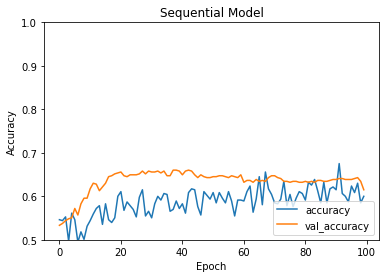

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Sequential Model")
plt.savefig("seq_model train val.png")